In [1]:
from espnff import League

In [2]:
league_id = 775166
season = 2018

# from browser cookie, 181227
swid = '{9F7C3455-C43D-42A6-9D1A-AEB707CB5F0B}'
espn_s2 = 'AEBSDwG1acaXBt31ap4LjKGjSaGd%2BBoXbFs59oEpoGUWCwjIcmEmxmEb%2F8asDxSz705IwB9HrGVBAgjZiFZ8m3aRY%2BHDEtG1lR1%2F%2BDrjkF1wqoeQaVfeeVzQE05y2HOJwEoT4Ojn1%2FHJQ3cjMqmHdUmdt70MX0zSjvjwnl15%2BCHnkVMEhX%2B7dTGidNtTmilvKlCFiO237AV%2FICfGA%2FcY9t1vGdesiEnJyDv6WEX6OGuWI%2FwkrjR%2BGUoAa7HM4U4kNIIEovl0FKG3bTRLoSHwFtDOVNUdfDnkOMoGiPCw82W0mA%3D%3D'

# initialize league object
l = League(league_id, season, espn_s2=espn_s2, swid=swid)

In [3]:
l.power_rankings(week=12)

[('62.20', Team(Spoiled Kareem)),
 ('60.00', Team(Sleepy  Gary )),
 ('55.40', Team(The DK DKers)),
 ('53.95', Team(New England Scroners )),
 ('50.30', Team(Reckless Rifter)),
 ('48.70', Team(3 am draft)),
 ('46.85', Team(The Hungry Dogs )),
 ('34.15', Team(Blount's Blunts))]

In [4]:
# create list of teams
team_power_ranks = {}
for t in range(8):
    team_power_ranks.update({l.teams[t].team_name: []})
    

# get power rankings for each week
for w in range(1, 17):
    for t in range(8):
        power_rank = l.power_rankings(w)[t]
        
        # append power ranking to list via indexing with team name
        team_power_ranks[power_rank[1].team_name].append(power_rank[0])
        
        

In [6]:
import matplotlib.pyplot as plt

# prep figure
plt.figure(figsize=(8,6))

# create list of teams
team_power_ranks = {}
for t in range(8):
    team_power_ranks.update({l.teams[t].team_name: []})

# plot power rankings
for f in team_power_ranks:
    plt.plot(team_power_ranks[f], label=f)
    

plt.legend()
plt.show()

<Figure size 800x600 with 1 Axes>

In [13]:
import numpy as np

# aggregate all scores
scores = []
for t in range(8):
    scores.append(l.teams[t].scores)

arr = np.array(scores)

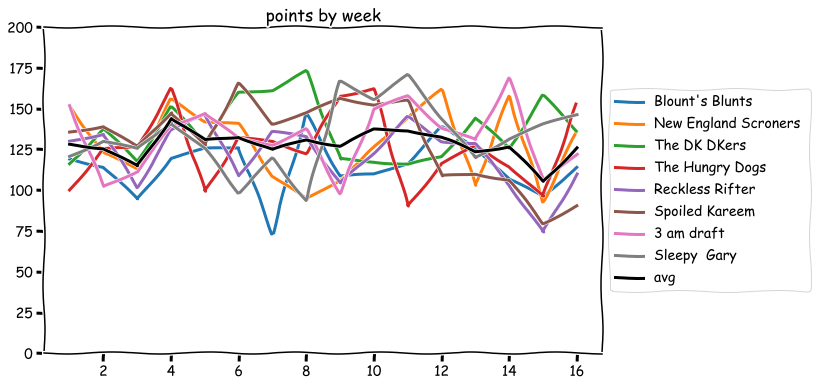

In [23]:
# xkcd cause it's hilarious
plt.xkcd()

# set xvals
xvals = [x for x in range(1, 17)]

# make figure
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

# plot
for t in range(0, 8):
    
    # get name
    name = l.teams[t].team_name
    
    # plot
    ax.plot(xvals, scores[t], linewidth=3, label=name)

# add average
ax.plot(xvals, np.mean(arr, 0), 'k', linewidth=3, label='avg')

# decorate
plt.title('points by week')
ax.set_ylim((0, 200))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

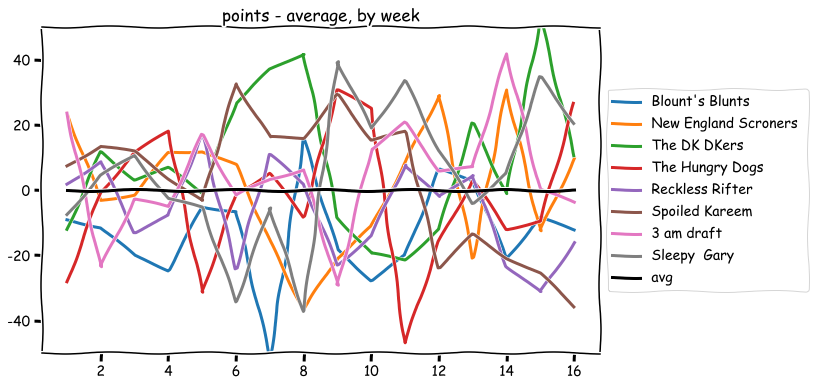

In [38]:
# xkcd cause it's hilarious
plt.xkcd()

# set xvals
xvals = [x for x in range(1, 17)]

# make figure
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

# set avg
avg = np.mean(arr, 0)

# plot
for t in range(0, 8):
    
    # get name
    name = l.teams[t].team_name
    
    # plot
    ax.plot(xvals, scores[t] - avg, linewidth=3, label=name)
    
# plot black line at zero
ax.plot(xvals, avg - avg, 'k', linewidth=3, label='avg')
    
    
# decorate
plt.title('points - average, by week')
ax.set_ylim((-50, 50))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Text(0.5, 1.0, 'weeks above league average')

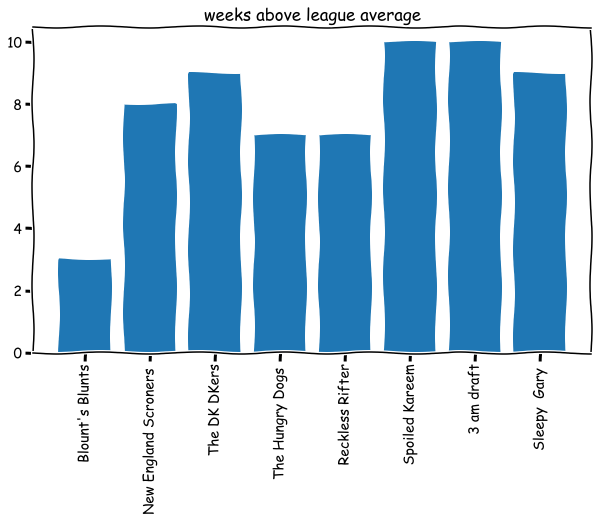

In [92]:
# make figure
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

# calculate weeks above average
greater_than_avg = (scores - avg > 0).astype(np.int8)

# get team names
names = []
for f in range(8):
    names.append(l.teams[f].team_name)

# plot as bar graph
xvals = [x for x in range(0,8)]
to_plot = np.sum(greater_than_avg, 1)
plt.bar(xvals, to_plot, tick_label=names)
plt.xticks(rotation='vertical')
plt.title('weeks above league average')


In [95]:
l.teams

[Team(Blount's Blunts),
 Team(New England Scroners ),
 Team(The DK DKers),
 Team(The Hungry Dogs ),
 Team(Reckless Rifter),
 Team(Spoiled Kareem),
 Team(3 am draft),
 Team(Sleepy  Gary )]

No handles with labels found to put in legend.


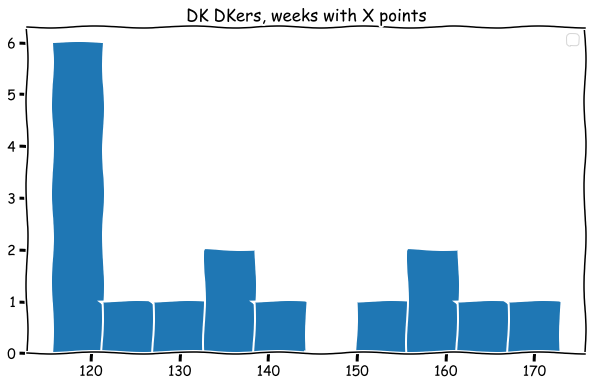

In [106]:
import seaborn as sns

# plot histogram of team's scores
# make figure
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

# dkers
t = l.teams[2].scores
r = l.teams[6].scores

# plot histogram
plt.hist(t)
#sns.distplot(t, label='tyler')
#.distplot(r, label='ray')
plt.title('DK DKers, weeks with X points')
plt.legend()

Text(0.5, 1.0, 'standard deviation by team')

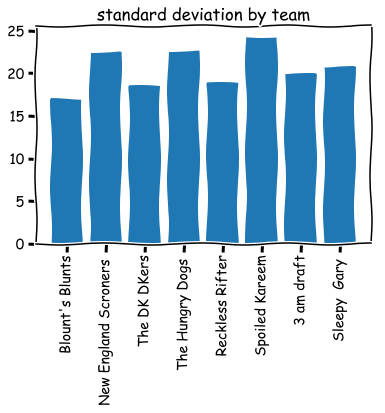

In [109]:
# plot standard deviation of each team
# get team names
names = []
for f in range(8):
    names.append(l.teams[f].team_name)
    
# calculate stdev
stdev = np.std(scores, 1)

# plot as bar plot
xvals = [x for x in range(0,8)]
plt.bar(xvals, stdev, tick_label=names)
plt.xticks(rotation='vertical')
plt.title('standard deviation by team')

[0 1 2 3 4 5 6 7]


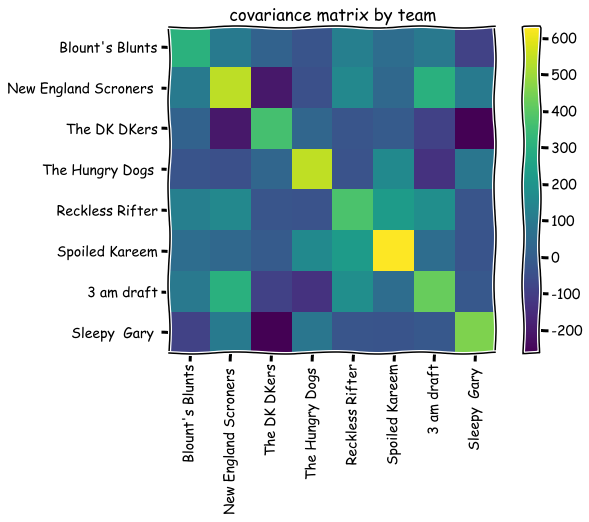

In [74]:
# make figure
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

# get team names
names = []
for f in range(8):
    names.append(l.teams[f].team_name)

# calculate covariance
cov = np.cov(arr)
#cov = np.corrcoef(arr)
plt.imshow(cov)
plt.title('covariance matrix by team')
plt.colorbar()

plt.yticks(ticks=[0,1,2,3,4,5,6,7], labels=names)
plt.xticks(ticks=[0,1,2,3,4,5,6,7], labels=names, rotation='vertical')
print(plt.yticks()[0])
#plt.xticks(labels=names)

In [44]:
#

["Blount's Blunts",
 'New England Scroners ',
 'The DK DKers',
 'The Hungry Dogs ',
 'Reckless Rifter',
 'Spoiled Kareem',
 '3 am draft',
 'Sleepy  Gary ']